In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Defining inputs and expected output (XOR truth table)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # 2x4 matrix, each column is a training example
d = np.array([0, 1, 1, 0])  # Expected output for XOR

In [3]:
# Network parameters
inputSize = 2     # Number of input neurons (x1, x2)
hiddenSize = 2    # Number of hidden neurons
outputSize = 1    # Number of output neurons
lr = 0.1          # Learning rate
epochs = 180000   # Number of training epochs

In [10]:
# Initialize weights and biases randomly within the range [-1, 1]
w1 = np.random.rand(hiddenSize, inputSize) * 2 - 1  # Weights from input to hidden layer
b1 = np.random.rand(hiddenSize, 1) * 2 - 1         # Bias for hidden layer
w2 = np.random.rand(outputSize, hiddenSize) * 2 - 1  # Weights from hidden to output layer
b2 = np.random.rand(outputSize, 1) * 2 - 1         # Bias for output layer

The neural network works in 5 stages: 
1. Forward pass
    * The input **X** is multiplied by the weights **w1** and passed through the first layer, followed by the application of the sigmoid or ReLU activation function. This gives the output for the hidden layer.
    * The output of the hidden layer is then passed through the second set of weights **w2** to compute the final output. Again, a sigmoid activation function is used to generate the final output **a2**.
    
2. Error calculation
    * The error is computed as the difference between the expected output **(d)** and the actual output **(a2)**.
3. Backward pass
    * **Output Layer**: The derivative of the sigmoid activation function is applied to the error, producing the gradient for the output layer **(da2)**. This is used to calculate how much the weights in the output layer need to be adjusted.
    * **Hidden Layer**: The error is then propagated backward to the hidden layer. The gradient at the hidden layer **(da1)** is computed by taking the dot product of the transpose of the weights **(w2.T)** and the gradient from the output layer. The derivative of the activation function (sigmoid or ReLU) is used to adjust this error.
4. Weights and bias updates
    * After computing the **gradients (dz1, dz2)**, the **weights (w1, w2)** and **biases (b1, b2)** are updated using the **learning rate (lr)** and **the gradients**. The updates are done to minimize the error and improve the model’s predictions.
5. Training:
    * This entire process is repeated over many iterations **(epochs)**. During each epoch, the model adjusts its weights and biases to reduce the error. Over time, the network learns to approximate the XOR function.
Forward Pass:

In [5]:
# Training the network using backpropagation
error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

    z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
    a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

    # Error calculation and backpropagation
    error = d - a2  # Difference between expected and actual output
    da2 = error * (a2 * (1 - a2))  # Derivative for output layer
    dz2 = da2  # Gradient for output layer

    # Propagate error to hidden layer
    da1 = np.dot(w2.T, dz2)  # Gradient for hidden layer
    dz1 = da1 * (a1 * (1 - a1))  # Derivative for hidden layer

    # Update weights and biases
    w2 += lr * np.dot(dz2, a1.T)  # Update weights from hidden to output layer
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)  # Update bias for output layer

    w1 += lr * np.dot(dz1, X.T)  # Update weights from input to hidden layer
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)  # Update bias for hidden layer
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))

Epoch: 9999, Average error: 0.06116
Epoch: 19999, Average error: 0.03154
Epoch: 29999, Average error: 0.02367
Epoch: 39999, Average error: 0.01969
Epoch: 49999, Average error: 0.01719
Epoch: 59999, Average error: 0.01543
Epoch: 69999, Average error: 0.01412
Epoch: 79999, Average error: 0.01309
Epoch: 89999, Average error: 0.01225
Epoch: 99999, Average error: 0.01155
Epoch: 109999, Average error: 0.01096
Epoch: 119999, Average error: 0.01045
Epoch: 129999, Average error: 0.01001
Epoch: 139999, Average error: 0.00961
Epoch: 149999, Average error: 0.00926
Epoch: 159999, Average error: 0.00894
Epoch: 169999, Average error: 0.00866
Epoch: 179999, Average error: 0.00840


### Test: XOR

In [6]:
# Testing the trained network
z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

# Print results
print('Final output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))


Final output after training: [[0.00837433 0.99200851 0.99035905 0.00758407]]
Ground truth [0 1 1 0]
Error after training: [[-0.00837436  0.00799151  0.00964098 -0.00758409]]
Average error: 0.00840


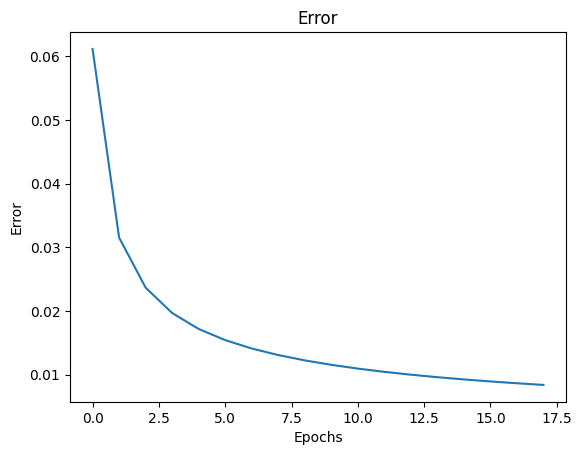

In [7]:
# Plot error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

### Test: AND

Epoch: 9999, Average error: 0.02691
Epoch: 19999, Average error: 0.01703
Epoch: 29999, Average error: 0.01329
Epoch: 39999, Average error: 0.01120
Epoch: 49999, Average error: 0.00984
Epoch: 59999, Average error: 0.00886
Epoch: 69999, Average error: 0.00812
Epoch: 79999, Average error: 0.00753
Epoch: 89999, Average error: 0.00705
Epoch: 99999, Average error: 0.00665
Epoch: 109999, Average error: 0.00630
Epoch: 119999, Average error: 0.00601
Epoch: 129999, Average error: 0.00575
Epoch: 139999, Average error: 0.00552
Epoch: 149999, Average error: 0.00531
Epoch: 159999, Average error: 0.00513
Epoch: 169999, Average error: 0.00496
Epoch: 179999, Average error: 0.00481

Final output after training: [[2.26224821e-04 4.95320597e-03 5.07228897e-03 9.91015767e-01]]
Ground truth [0 0 0 1]
Error after training: [[-0.00022623 -0.00495322 -0.0050723   0.00898426]]
Average error: 0.00481


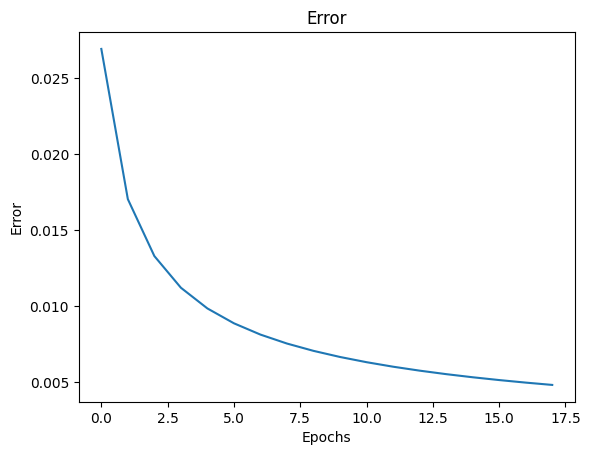

In [ ]:
# 가중치 업데이트 안하고 실행하면 에러 발산함

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # 2x4 matrix, each column is a training example
d = np.array([0, 0, 0, 1])  # Expected output for AND

# Training the network using backpropagation
error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

    z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
    a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

    # Error calculation and backpropagation
    error = d - a2  # Difference between expected and actual output
    da2 = error * (a2 * (1 - a2))  # Derivative for output layer
    dz2 = da2  # Gradient for output layer

    # Propagate error to hidden layer
    da1 = np.dot(w2.T, dz2)  # Gradient for hidden layer
    dz1 = da1 * (a1 * (1 - a1))  # Derivative for hidden layer

    # Update weights and biases
    w2 += lr * np.dot(dz2, a1.T)  # Update weights from hidden to output layer
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)  # Update bias for output layer

    w1 += lr * np.dot(dz1, X.T)  # Update weights from input to hidden layer
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)  # Update bias for hidden layer
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))


# Testing the trained network
z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

# Print results
print('\nFinal output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))

# Plot error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()
